# Data Cleaning

In [66]:
# import packages

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sqlite3

### 1 - Bikes Dataframe

In [2]:
df_bikes = pd.read_csv('bikes.csv')
df_bikes.head()

,id,empty_slots,free_bikes,latitude,longitude
0,0,24,12,49.262487,-123.114397
1,1,11,5,49.274566,-123.121817
2,2,5,20,49.279764,-123.110154
3,3,15,1,49.260599,-123.113504
4,4,10,6,49.264215,-123.117772


In [3]:
# I won't be using latitude, longitude, and empty_slots columns anymore:

columns_to_keep = ['id', 'free_bikes']

df_bikes = df_bikes[columns_to_keep]

df_bikes.head()

,id,free_bikes
0,0,12
1,1,5
2,2,20
3,3,1
4,4,6


In [4]:
df_bikes.describe()

,id,free_bikes
count,244.000000,244.000000
mean,121.500000,9.176230
std,70.580923,5.366955
min,0.000000,0.000000
25%,60.750000,5.000000
50%,121.500000,9.000000
75%,182.250000,12.250000
max,243.000000,28.000000


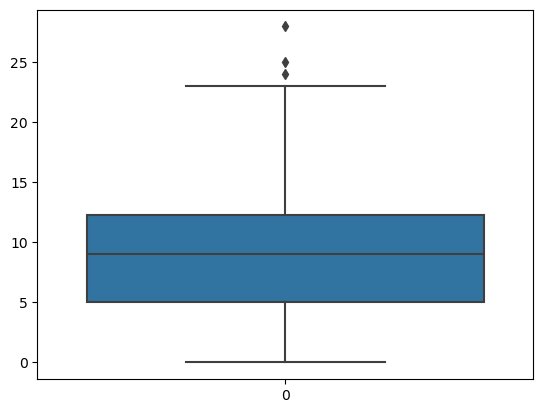

In [5]:
sns.boxplot(df_bikes['free_bikes'])

plt.show()

In [6]:
# There are 3 datapoints outside of the upper bound, I'll check their values:

df_bikes.sort_values(by='free_bikes', ascending=False)

,id,free_bikes
206,206,28
59,59,25
27,27,24
148,148,23
88,88,22
...,...,...
113,113,0
159,159,0
15,15,0
9,9,0


In my opinion they don't look abnormal and the dataset of bike stations contains only 243 rows. I won't remove them.

In [7]:
# Check for NaNs:

df_bikes['free_bikes'].isnull().sum()

0

### 2 - Yelp Dataframe

In [8]:
df_yelp = pd.read_csv('yelp.csv')
df_yelp.head()

,id,bikes_id,review_count,rating,price,distance
0,6iOAgzJ0DRZNSKA3FSrrOg,0,685,4.0,$$,169.517456
1,XAH2HpuUUtu7CUO26pbs4w,0,234,4.5,$$,178.845344
2,NensKn1MSVU_rm-1Y6WlFA,0,289,4.0,$$,102.329817
3,4118Aq9LbkvUr4s719uUkA,0,117,4.5,$$$,152.157897
4,F5wxgIiZE7LYQxgqhI483A,0,32,4.5,NaN,168.615262


In [9]:
df_yelp.describe()

,bikes_id,review_count,rating,distance
count,97002.000000,97002.000000,97002.000000,97002.000000
mean,121.143925,338.029123,4.091735,485.195352
std,70.457828,373.845846,0.400699,332.704452
min,0.000000,1.000000,1.500000,1.973312
25%,60.000000,102.000000,4.000000,228.021839
50%,121.000000,212.000000,4.000000,389.438120
75%,182.000000,445.000000,4.500000,728.569790
max,243.000000,2608.000000,5.000000,5607.529573


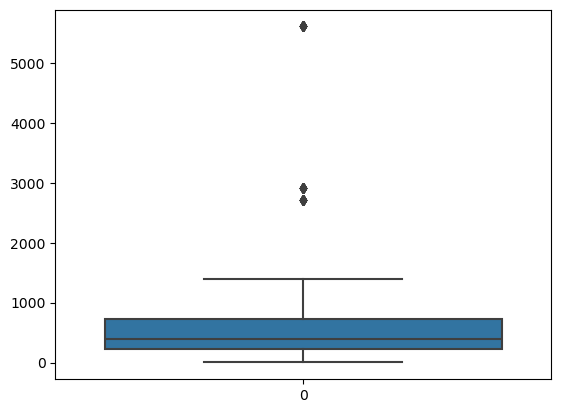

In [10]:
sns.boxplot(df_yelp['distance'])

plt.show()

In [11]:
# Will remove the datapoints which 'distance' is over 1000(m):

df_yelp = df_yelp[df_yelp['distance'] <= 1000]

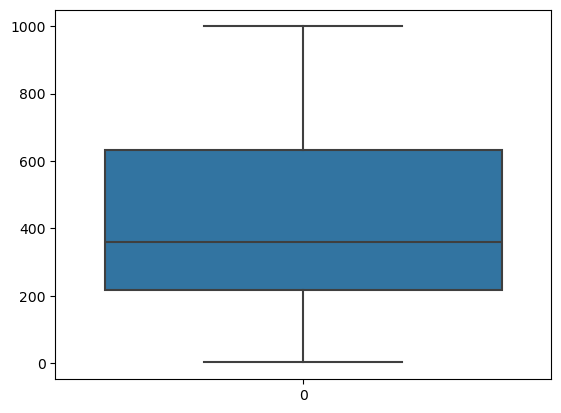

In [12]:
# Now it'll look better:

sns.boxplot(df_yelp['distance'])

plt.show()

"Review_count" could be another column with potential outliers. However, it's very likely that those businesses pay for reviews, so I'll leave as is.

In [13]:
print(df_yelp.shape)
df_yelp.isnull().sum()

(89053, 6)


id                  0
bikes_id            0
review_count        0
rating              0
price           11042
distance            0
dtype: int64

In [14]:
# There are many NaN values in the 'price' column. I will still have over 85,000 rows of data to work with.
# I will remove those NaN rows:

df_yelp.dropna(inplace=True)

In [15]:
df_yelp.shape

(78011, 6)

### 3 - FourSquare Dataframe

In [16]:
df_4s = pd.read_csv('four_square.csv')
df_4s.head()

,bikes_id,category_ids
0,0,13034
1,0,13263
2,0,13306
3,0,17069
4,0,17071


In [17]:
df_4s.isnull().sum()

bikes_id        0
category_ids    0
dtype: int64

# ---------------------------------------------------------------------------------------------------------------

# Data Transformation


### 1 - Yelp Dataframe

In [18]:
# Convert the 'price' column into numeric in order to be able to get some valuable insights out of it:

price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$':4}

df_yelp['price_numeric'] = df_yelp['price'].map(price_mapping)


# Drop the no-longer-needed 'price' column, as well with the 'id':

df_yelp.drop(['id','price'], axis=1, inplace=True)

df_yelp


,bikes_id,review_count,rating,distance,price_numeric
0,0,685,4.0,169.517456,2
1,0,234,4.5,178.845344,2
2,0,289,4.0,102.329817,2
3,0,117,4.5,152.157897,3
5,0,226,4.0,191.044234,2
...,...,...,...,...,...
96997,243,397,4.0,569.394966,2
96998,243,177,4.0,744.999190,2
96999,243,50,4.5,842.112588,1
97000,243,61,4.0,381.561636,2


In [19]:
df_yelp.reset_index(inplace=True)
df_yelp

,index,bikes_id,review_count,rating,distance,price_numeric
0,0,0,685,4.0,169.517456,2
1,1,0,234,4.5,178.845344,2
2,2,0,289,4.0,102.329817,2
3,3,0,117,4.5,152.157897,3
4,5,0,226,4.0,191.044234,2
...,...,...,...,...,...,...
78006,96997,243,397,4.0,569.394966,2
78007,96998,243,177,4.0,744.999190,2
78008,96999,243,50,4.5,842.112588,1
78009,97000,243,61,4.0,381.561636,2


### 2 - FourSquare Dataframe

In [20]:
df_4s.head()

,bikes_id,category_ids
0,0,13034
1,0,13263
2,0,13306
3,0,17069
4,0,17071


'Category_ids' column is not saying much in this form. I pulled a CSV file from 4Square documentation where the names of each category number can be found. 
Big categories are separated by the 10,000s.
I will split the categories into 10 groups:

In [21]:
df_cat = pd.read_csv('categories.csv')
df_cat

,Category ID,Category Label
0,10000,Arts and Entertainment
1,11000,Business and Professional Services
2,12000,Community and Government
3,13000,Dining and Drinking
4,14000,Event
5,15000,Health and Medicine
6,16000,Landmarks and Outdoors
7,17000,Retail
8,18000,Sports and Recreation
9,19000,Travel and Transportation


In [22]:
# I'll use the floor division to get the first 2 digits of the category number:

df_cat['Category ID'] = df_cat['Category ID'] // 1000
df_cat.head()

,Category ID,Category Label
0,10,Arts and Entertainment
1,11,Business and Professional Services
2,12,Community and Government
3,13,Dining and Drinking
4,14,Event


In [23]:
# Same here but for the other dataset:

df_4s['category_ids'] = df_4s['category_ids'] // 1000
df_4s

,bikes_id,category_ids
0,0,13
1,0,13
2,0,13
3,0,17
4,0,17
...,...,...
41027,243,13
41028,243,17
41029,243,13
41030,243,13


In [24]:
# Combine them:

df_4s_categorized = pd.merge(df_4s, df_cat, left_on = 'category_ids', right_on = 'Category ID', how='inner')

df_4s_categorized.drop(['category_ids','Category ID'], axis=1, inplace=True)

# Make sure the total amount the rows stay the same after the merge: 41032

print(df_4s_categorized.shape)

df_4s_categorized['Category Label'].value_counts()

(41032, 2)


Category Label
Dining and Drinking                   31686
Retail                                 4240
Landmarks and Outdoors                 2230
Arts and Entertainment                 1590
Business and Professional Services      420
Community and Government                360
Sports and Recreation                   230
Health and Medicine                     180
Travel and Transportation                96
Name: count, dtype: int64

In [25]:
# Amount of rows is correct:

df_4s_categorized

,bikes_id,Category Label
0,0,Dining and Drinking
1,0,Dining and Drinking
2,0,Dining and Drinking
3,0,Dining and Drinking
4,0,Dining and Drinking
...,...,...
41027,219,Sports and Recreation
41028,219,Sports and Recreation
41029,219,Sports and Recreation
41030,219,Sports and Recreation


# ---------------------------------------------------------------------------------------------------------------

# Data Joining

### SQLite3

In [26]:
# This will be my database name:

db = 'bikes_database.db'


# Create the connection with  SQLite:

connection = sqlite3.connect(db)

In [27]:
# Using the 'to_sql' method, I will add the 3 dataframes I created to SQL as 3 separated tables:
# In case it exists, I will replace it:

df_bikes.to_sql('bikes', connection, index=False, if_exists='replace')
df_yelp.to_sql('yelp', connection, index=False, if_exists='replace')
df_4s_categorized.to_sql('four_square', connection, index=False, if_exists='replace')

connection.close()

### Some insights:

In [65]:
# Total Bikes:

df_total = df_bikes['free_bikes'].value_counts().reset_index(name='count')
df_total['total'] = df_total['free_bikes'] * df_total['count']
df_total['total'].sum()

2239

In [61]:
# Average available bikes per station:

df_bikes['free_bikes'].sum()/len(df_bikes)

9.176229508196721

### Combining dataframes:

In [28]:
df_bikes_yelp = pd.merge(df_bikes, df_yelp, left_on='id', right_on='bikes_id', how='inner')
df_bikes_yelp.drop(['index','bikes_id'], axis=1,inplace=True)
df_bikes_yelp.to_csv('bikes_yelp.csv')
df_bikes_yelp

,id,free_bikes,review_count,rating,distance,price_numeric
0,0,12,685,4.0,169.517456,2
1,0,12,234,4.5,178.845344,2
2,0,12,289,4.0,102.329817,2
3,0,12,117,4.5,152.157897,3
4,0,12,226,4.0,191.044234,2
...,...,...,...,...,...,...
78006,243,9,397,4.0,569.394966,2
78007,243,9,177,4.0,744.999190,2
78008,243,9,50,4.5,842.112588,1
78009,243,9,61,4.0,381.561636,2


Amount of rows is consistant before and after the merge: 78011